In [1]:
import netCDF4 as nc
import numpy as npy

import pandas as pd

In [2]:
ref_mask = npy.squeeze(nc.Dataset("01.nc").variables["SSHIBC"][:].mask)
res_mask = npy.zeros((1800, 3600), dtype=bool)

for i in range(1800):
    for j in range(3600):
        if False == ref_mask[359-i//5, j//5]:
            res_mask[i, j] = True

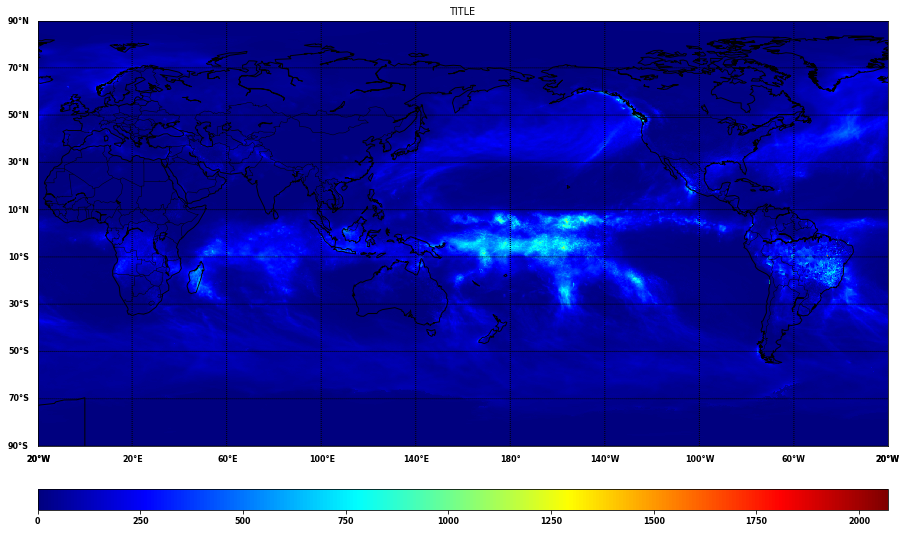

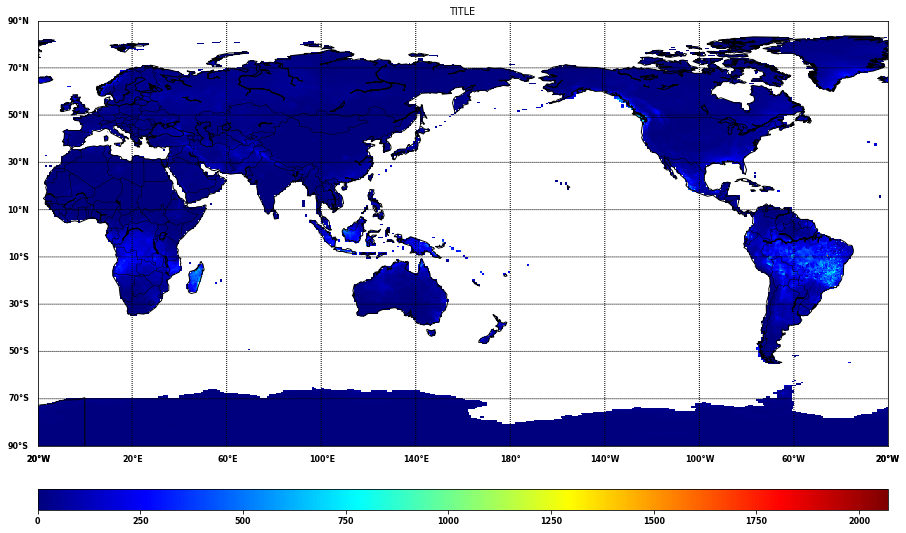

In [3]:
from utils.func import plot_to_map
from utils.const import LATS_PREC, LONS_PREC
datas = nc.Dataset("199201.nc").variables["precipitation"][:].data
result = npy.ma.masked_array(data=npy.squeeze(datas), mask=res_mask)
plot_to_map(LONS_PREC, LATS_PREC, datas, low_lon=None, up_lon=None, low_lat=None, up_lat=None)
plot_to_map(LONS_PREC, LATS_PREC, result, low_lon=None, up_lon=None, low_lat=None, up_lat=None)

In [4]:
lon = LONS_PREC
lat = LATS_PREC

res_crop = res_mask.copy()

for i in range(1800):
    for j in range(3600):
        la = lat[i]
        lo = lon[j]
        if (20<=la<=33) and (100<=lo<=125) and (False == res_mask[i, j]):
            res_crop[i, j] = False
        else:
            res_crop[i, j] = True
   

C:\Users\TELPER~1\AppData\Local\Temp/ipykernel_10804/4281744486.py:2: RuntimeWarning: divide by zero encountered in log
  plot_to_map(LONS_PREC, LATS_PREC, npy.log(result+1), low_lon=100, up_lon=140, low_lat=15, up_lat=55)


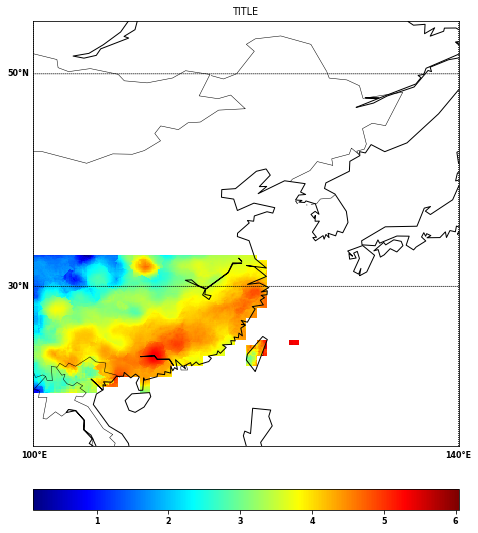

In [5]:

result = npy.ma.masked_array(data=npy.squeeze(datas), mask=res_crop)
plot_to_map(LONS_PREC, LATS_PREC, npy.log(result+1), low_lon=100, up_lon=140, low_lat=15, up_lat=55)

In [6]:
pd.DataFrame(res_crop).to_csv("river_south.csv", index=0)

+ 华南：纬度20~27.2；经度100~125
+ 华中就是长江中下游这一大片划一块：纬度27.2~36；经度100~125
+ 华北：纬度36~44，经度100-125
+ 东北：纬度40~53.5；经度120-135